In [1]:
import pandas as pd
import numpy as np

nba = pd.read_csv("nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [2]:
point_guards = nba[nba['pos'] == 'PG']
point_guards.head()


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013


In [3]:
point_guards.shape[0]

85

In [7]:
point_guards = point_guards[point_guards['tov'] != 0]

point_guards['atr'] = point_guards['ast'] / point_guards['tov']
point_guards['atr'].head()
point_guards.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end', 'atr'],
      dtype='object')

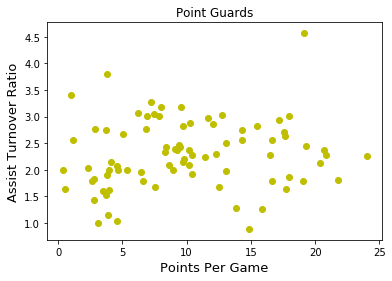

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
point_guards['ppg'] = point_guards['pts'] / point_guards['g']
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [11]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

In [12]:
random_initial_points

array([204, 207, 347,  85, 253])

In [13]:
centroids

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,atr,ppg
204,George Hill,PG,27,IND,76,76,2434,272,616,0.442,...,265,75,23,92,158,781,2013-2014,2013,2.880435,10.276316
207,Kirk Hinrich,PG,33,CHI,73,61,2116,243,619,0.393,...,286,80,26,120,203,666,2013-2014,2013,2.383333,9.123288
347,Chris Paul,PG,28,LAC,62,62,2171,406,870,0.467,...,663,154,4,145,157,1185,2013-2014,2013,4.572414,19.112903
85,Michael Carter-Williams,PG,22,PHI,70,70,2414,427,1054,0.405,...,441,130,43,247,213,1167,2013-2014,2013,1.785425,16.671429
253,Brandon Knight,PG,22,MIL,72,69,2400,461,1092,0.422,...,352,69,17,188,146,1291,2013-2014,2013,1.872340,17.930556


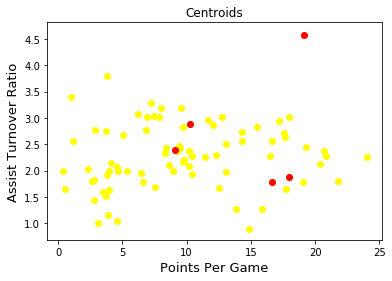

In [14]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

In [15]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)
centroids_dict

{0: [10.276315789473685, 2.880434782608696],
 1: [9.123287671232877, 2.3833333333333333],
 2: [19.112903225806452, 4.572413793103448],
 3: [16.67142857142857, 1.785425101214575],
 4: [17.930555555555557, 1.872340425531915]}

In [16]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24

In [17]:
# Add the function, `assign_to_cluster`
# This creates the column, `cluster`, by applying assign_to_cluster row-by-row
# Uncomment when ready

# point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
from scipy.spatial.distance import euclidean

def assign_to_cluster(row):
    min_euc = float('Inf')
    min_cluster_id = 0
    for cluster_id, vector in centroids_dict.items():
        euc = euclidean(vector, [row['ppg'], row['atr']])
        if euc < min_euc:
            min_euc = euc
            min_cluster_id = cluster_id
    return min_cluster_id

point_guards['cluster'] = point_guards.apply(assign_to_cluster, axis=1)

point_guards['cluster'].head()

24    0
29    1
30    1
38    1
50    1
Name: cluster, dtype: int64

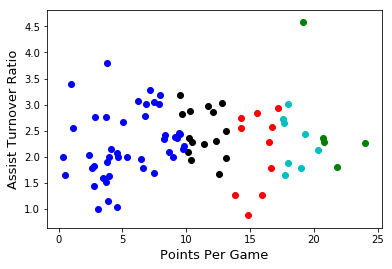

In [21]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
    plt.xlabel('Points Per Game', fontsize=13)
    plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

In [22]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    # 0..1...2...3...4
    for cluster_id in range(0, num_clusters):
        # Finish the logic
        players_cluster = df[df['cluster'] == cluster_id]
        ppg_c = players_cluster['ppg'].mean()    
        atr_c = players_cluster['atr'].mean()
        new_centroids_dict[cluster_id] = [ppg_c, atr_c]
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
centroids_dict

{0: [11.304075231619834, 2.4747286296733275],
 1: [5.453976705299926, 2.236946232054706],
 2: [21.27919311000938, 2.6573605637295046],
 3: [15.576761213740742, 2.1124487726215335],
 4: [18.44076504819969, 2.2819875180691103]}

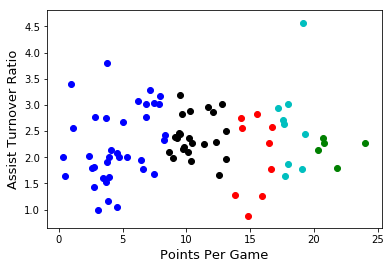

In [23]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

{0: [9.504273306160897, 2.5004813934586996], 1: [3.824757946368798, 2.116084621432048], 2: [21.526056909292535, 2.169168884921022], 3: [14.247386420754951, 2.0906472368373743], 4: [17.89501636371822, 2.5447109148773572]}


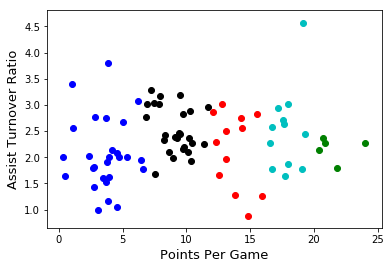

In [26]:
centroids_dict = recalculate_centroids(point_guards)
print(centroids_dict)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

{0: [9.093223264777759, 2.5242979431948673], 1: [3.6016760434062176, 2.058609501910136], 2: [21.526056909292535, 2.169168884921022], 3: [13.714579155255775, 2.1571687260884143], 4: [17.779292426235372, 2.522306844384704]}


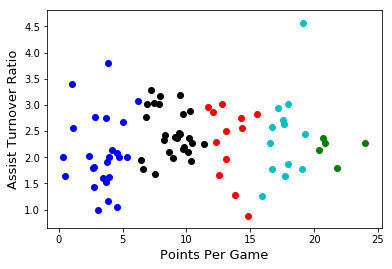

In [27]:
centroids_dict = recalculate_centroids(point_guards)
print(centroids_dict)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

{0: [8.805755409528752, 2.459190325637582], 1: [3.369879813289865, 2.073854692509141], 2: [21.526056909292535, 2.169168884921022], 3: [13.361801377477995, 2.2992513167004165], 4: [17.634731470371115, 2.425568308843799]}


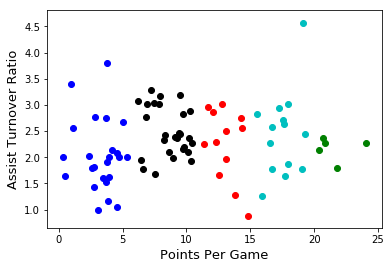

In [28]:
centroids_dict = recalculate_centroids(point_guards)
print(centroids_dict)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

{0: [8.614448825166612, 2.489817106264363], 1: [3.251032212917684, 2.032060176491894], 2: [21.526056909292535, 2.169168884921022], 3: [13.018051377477995, 2.25070480507251], 4: [17.48314350820175, 2.454639011036019]}


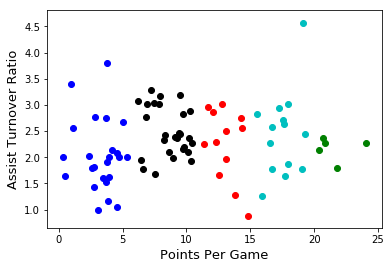

In [29]:
centroids_dict = recalculate_centroids(point_guards)
print(centroids_dict)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

{0: [8.614448825166612, 2.489817106264363], 1: [3.251032212917684, 2.032060176491894], 2: [21.526056909292535, 2.169168884921022], 3: [13.018051377477995, 2.25070480507251], 4: [17.48314350820175, 2.454639011036019]}


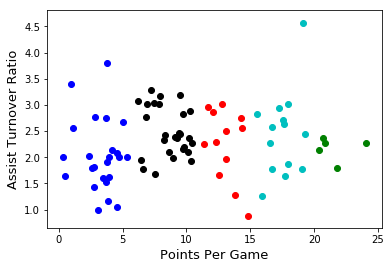

In [30]:
centroids_dict = recalculate_centroids(point_guards)
print(centroids_dict)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)